In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sys

import warnings
warnings.filterwarnings('ignore')

# load data
data = pd.read_excel("../../raw_data/market_data.xlsx")

In [14]:
# select data for vic only

vic_only = data[['Time (UTC+10)', 'Regions VIC Trading Price ($/MWh)', 'Regions VIC Trading Total Intermittent Generation (MW)', 'Regions VIC Operational Demand (MW)']]

In [15]:
pd.options.mode.chained_assignment = None

## I. Data Preprocessing
**Note; more preprocessing to be done as we came up with what algorithms to use

In [16]:
# convert to date time
vic_only['Time (UTC+10)'] = pd.to_datetime(vic_only['Time (UTC+10)'], format="%Y-%m-%d %H:%M:%S")
vic_only['Date'] = vic_only['Time (UTC+10)'].dt.date
vic_only['Time'] = vic_only['Time (UTC+10)'].dt.time
for i in range(len(vic_only['Time (UTC+10)'])):
    if vic_only['Time (UTC+10)'][i] == '2020-01-07 15:00:00':
        print(i)
        break
        
vic_only.loc[vic_only['Time (UTC+10)'] == '2020-07-01 15:00:00']

,Time (UTC+10),Regions VIC Trading Price ($/MWh),Regions VIC Trading Total Intermittent Generation (MW),Regions VIC Operational Demand (MW),Date,Time
43806,2020-07-01 15:00:00,20.7,335.54,5101,2020-07-01,15:00:00


In [20]:
vic_only

,Time (UTC+10),Regions VIC Trading Price ($/MWh),Regions VIC Trading Total Intermittent Generation (MW),Regions VIC Operational Demand (MW),Date,Time
0,2018-01-01 00:00:00,90.43,146.87,4599,2018-01-01,00:00:00
1,2018-01-01 00:30:00,92.46,131.68,4398,2018-01-01,00:30:00
2,2018-01-01 01:00:00,87.62,119.98,4238,2018-01-01,01:00:00
3,2018-01-01 01:30:00,73.08,123.86,4112,2018-01-01,01:30:00
4,2018-01-01 02:00:00,70.18,132.72,3956,2018-01-01,02:00:00
...,...,...,...,...,...,...
63452,2021-08-14 22:00:00,49.93,182.52,5492,2021-08-14,22:00:00
63453,2021-08-14 22:30:00,62.86,206.23,5344,2021-08-14,22:30:00
63454,2021-08-14 23:00:00,32.26,215.20,5204,2021-08-14,23:00:00
63455,2021-08-14 23:30:00,25.10,226.95,5268,2021-08-14,23:30:00


In [21]:
def period_year(year, data):
    period = ((data['Time (UTC+10)'] >= f'{year}-01-01 00:00:00') & (data['Time (UTC+10)'] <= f'{year}-12-31 23:30:00'))
    return period

period_2018 = period_year(2018, vic_only)
period_2019 = period_year(2019, vic_only)
period_2020 = period_year(2020, vic_only)
period_2021 = period_year(2021, vic_only)

# select year
vic_2018 = vic_only.loc[period_2018]
vic_2019 = vic_only.loc[period_2019]
vic_2020 = vic_only.loc[period_2020]
vic_2021 = vic_only.loc[period_2021]

# group by Time
g_2018 = vic_2018.groupby('Time')
h_2018 = pd.DataFrame(g_2018.mean()) # change .mean() to other parameters to obtain min, count, max, etc.
g_2019 = vic_2019.groupby('Time')
h_2019 = pd.DataFrame(g_2019.mean())
g_2020 = vic_2020.groupby('Time')
h_2020 = pd.DataFrame(g_2020.mean())
g_2021 = vic_2021.groupby('Time')
h_2021 = pd.DataFrame(g_2021.mean())
g_2018.describe()

# h_2018 - h_2021 contains the mean price for each 30 minutes in a year

Regions VIC Trading Price ($/MWh)                                  \
                                     count        mean         std     min   
Time                                                                         
00:00:00                             365.0   98.317534   40.538555   10.50   
00:30:00                             365.0   80.125507   30.264460    4.14   
01:00:00                             365.0   74.660000   29.125123   -0.01   
01:30:00                             365.0   68.384110   32.843269 -157.92   
02:00:00                             365.0   62.909041   43.017225 -554.62   
02:30:00                             365.0   57.694055   31.543323 -296.45   
03:00:00                             365.0   54.504575   33.936052 -387.56   
03:30:00                             365.0   54.861562   25.997327  -25.80   
04:00:00                             365.0   53.388986   31.369274 -239.87   
04:30:00                             365.0   54.768822   32.198400 -201.66   
05:00:00                             365.0   57.720822   29.278274  -62.82   
05:30:00                             365.0   66.804603   32.908718  -69.40   
06:00:00                             365.0   71.387562   35.438257  -45.74   
06:30:00                             365.0   85.534521   35.808402   -1.37   
07:00:00                             365.0  105.875425   51.461199    0.30   
07:30:00                             365.0   90.871753   37.929081  -18.57   
08:00:00                             365.0  104.670630  114.910758    5.24   
08:30:00                             365.0   98.972904   41.105666  -26.28   
09:00:00                             365.0   91.763370   31.623775    9.56   
09:30:00                             365.0   92.523671   36.443883  -19.27   
10:00:00                             365.0   86.754247   31.762901    6.25   
10:30:00                             365.0   85.269096   34.640613  -15.09   
11:00:00                             365.0   84.108466   32.013305  -24.62   
11:30:00                             365.0   81.231507   34.253676   -5.24   
12:00:00                             365.0   79.916274   34.278770  -37.36   
12:30:00                             365.0   78.315096   35.981199  -97.25   
13:00:00                             365.0   77.534877   33.701759  -55.44   
13:30:00                             365.0   78.876411   34.816955  -50.50   
14:00:00                             365.0   90.539534  152.705028  -46.72   
14:30:00                             365.0  108.270521  528.628112  -55.47   
15:00:00                             365.0   95.884082  190.665082  -57.87   
15:30:00                             365.0  104.880000  193.946468  -54.31   
16:00:00                             365.0  125.416932  401.108699   16.54   
16:30:00                             365.0  123.657233  365.326125   -4.60   
17:00:00                             365.0  156.904548  742.497266   16.94   
17:30:00                             365.0  134.367178  621.282903   21.88   
18:00:00                             365.0  134.328904  263.850603   16.63   
18:30:00                             365.0  125.063288   52.353652   53.87   
19:00:00                             365.0  127.172959   55.554515   53.68   
19:30:00                             365.0  106.597616   37.626718   22.61   
20:00:00                             365.0  103.666877   32.397662   51.64   
20:30:00                             365.0  101.103233   29.599148   39.57   
21:00:00                             365.0   94.520110   26.907759   35.76   
21:30:00                             365.0   89.257315   22.079594   34.46   
22:00:00                             365.0   82.661699   21.500337   10.39   
22:30:00                             365.0   89.737151   30.479376    8.95   
23:00:00                             365.0   80.394932   25.836207    6.47   
23:30:00                             365.0   89.848247   31.324628   11.20   

                              

In [22]:
# rename columns
h_2018.columns = ['Mean Regions VIC Trading Price ($/MWh) - 2018', 'Mean Regions VIC Trading Total Intermittent Generation (MW) - 2018', ' Mean Regions VIC Operational Demand (MW) - 2018']
h_2018

,Mean Regions VIC Trading Price ($/MWh) - 2018,Mean Regions VIC Trading Total Intermittent Generation (MW) - 2018,Mean Regions VIC Operational Demand (MW) - 2018
Time,,,
00:00:00,98.317534,168.652959,5022.531507
00:30:00,80.125507,164.905616,4826.849315
01:00:00,74.660000,162.570301,4664.857534
01:30:00,68.384110,162.198329,4536.838356
02:00:00,62.909041,162.855014,4375.764384
02:30:00,57.694055,163.017479,4251.969863
03:00:00,54.504575,163.302493,4168.536986
03:30:00,54.861562,165.728329,4131.084932
04:00:00,53.388986,167.374000,4119.194521


In [23]:
# group by date to obtain mean, min and max price in a day from 2018-2021
gg_2018 = vic_2018.groupby('Date')
hh_2018 = pd.DataFrame(gg_2018.mean())
gg_2019 = vic_2019.groupby('Date')
hh_2019 = pd.DataFrame(gg_2019.mean())
gg_2020 = vic_2020.groupby('Date')
hh_2020 = pd.DataFrame(gg_2020.mean())
gg_2021 = vic_2021.groupby('Date')
hh_2021 = pd.DataFrame(gg_2021.mean())
gg_2018.describe()

Regions VIC Trading Price ($/MWh)                                \
                                       count        mean        std    min   
Date                                                                         
2018-01-01                              48.0   71.466875   7.305045  59.90   
2018-01-02                              48.0   68.788125   8.896898  51.11   
2018-01-03                              48.0   66.658333   8.745167  46.83   
2018-01-04                              48.0   77.299583  16.802920  40.40   
2018-01-05                              48.0   88.099167  23.717860  53.90   
...                                      ...         ...        ...    ...   
2018-12-27                              48.0   94.922500  37.189905  48.04   
2018-12-28                              48.0  113.445833  54.653834  49.32   
2018-12-29                              48.0   90.517292  31.038823  32.20   
2018-12-30                              48.0   83.291667  17.241933  56.82   
2018-12-31                              48.0   84.598542  11.347672  64.60   

                                               \
                25%     50%       75%     max   
Date                                            
2018-01-01  66.4600  70.110   74.9300   92.46   
2018-01-02  63.6600  70.345   76.4475   82.21   
2018-01-03  62.6275  70.335   73.1900   77.83   
2018-01-04  63.9375  80.960   90.8300  102.71   
2018-01-05  72.6000  84.470  101.8025  150.99   
...             ...     ...       ...     ...   
2018-12-27  66.3425  87.835  116.4375  215.53   
2018-12-28  74.7450  95.370  128.9575  290.00   
2018-12-29  74.3550  85.120  106.9575  191.15   
2018-12-30  70.5800  80.355   95.5875  129.42   
2018-12-31  76.7800  85.375   93.6175  108.30   

           Regions VIC Trading Total Intermittent Generation (MW)              \
                                                            count        mean   
Date                                                                            
2018-01-01                                               48.0      125.215417   
2018-01-02                                               48.0      158.766458   
2018-01-03                                               48.0      139.006250   
2018-01-04                                               48.0       57.345417   
2018-01-05                                               48.0       34.052500   
...                                                       ...             ...   
2018-12-27                                               48.0      118.540208   
2018-12-28                                               48.0      132.968958   
2018-12-29                                               48.0      100.163333   
2018-12-30                                               48.0       97.425000   
2018-12-31                                               48.0       82.713958   

            ...                   Regions VIC Operational Demand (MW)  \
            ...       75%     max                               count   
Date        ...                                                         
2018-01-01  ...  143.2475  185.54                                48.0   
2018-01-02  ...  224.6075  291.39                                48.0   
2018-01-03  ...  185.2075  225.26                                48.0   
2018-01-04  ...   84.1775  150.52                                48.0   
2018-01-05  ...   49.1900   75.22                                48.0   
...         ...       ...     ...                                 ...   
2018-12-27  ...  181.7175  240.02                                48.0   
2018-12-28  ...  170.5725  242.17                                48.0   
2018-12-29  ...  125.0325  325.48                                48.0   
2018-12-30  ...  127.3875  251.47                                48.0   
2018-12-31  ...   95.6750  221.84                                48.0   

                                                                         

### To-do / checkpoints:
- some algorithms may need different preprocessed data (to be done once algorithm is finalised)
- export the finalized preprocessed data to csv
- for external dataset, may want to consider weather

## II. Data Visualisation of Preprocessed Data

AxesSubplot(0.125,0.536818;0.352273x0.343182)


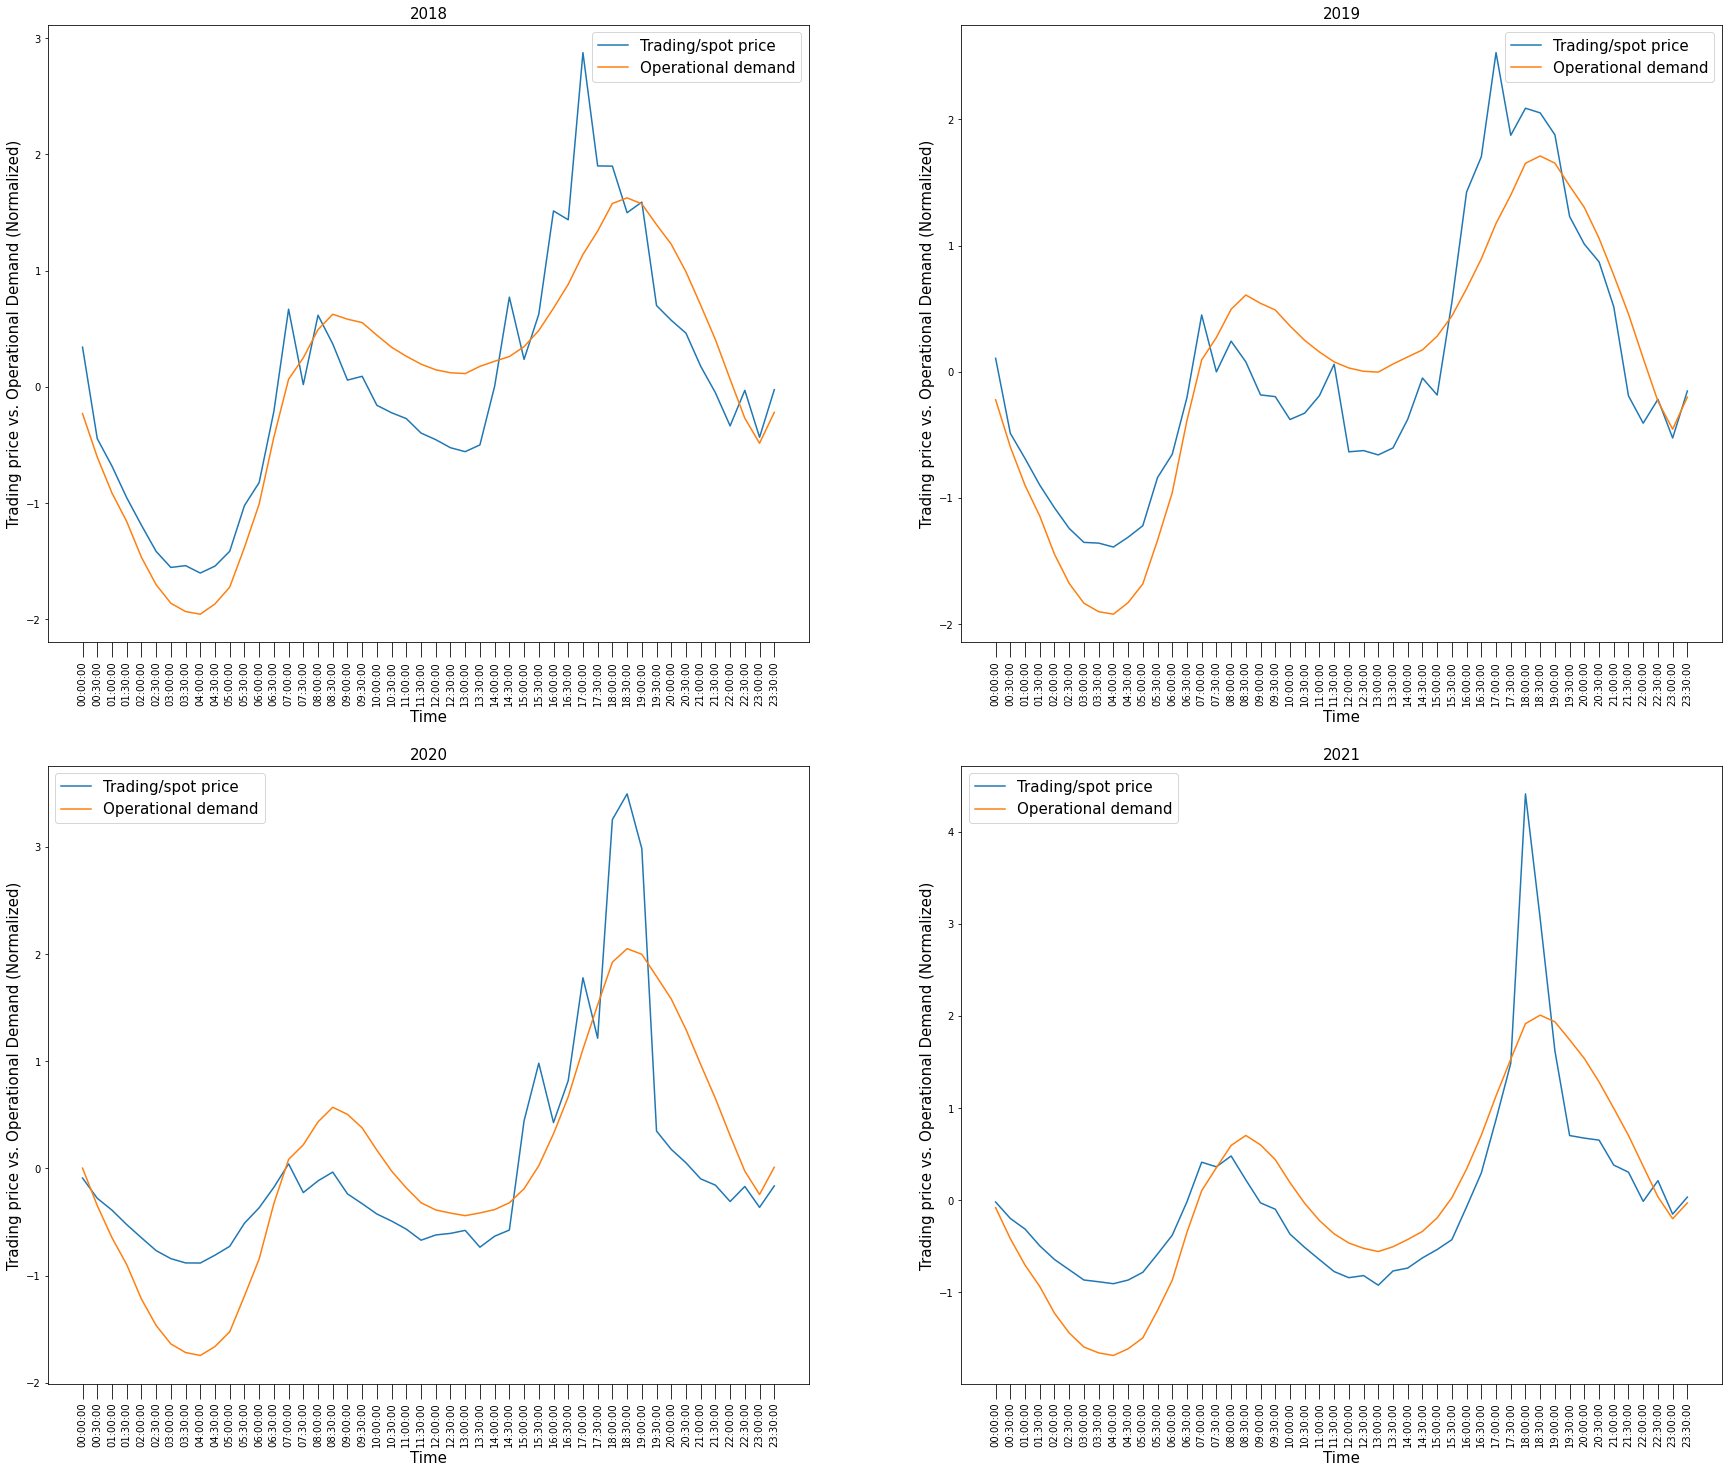

In [308]:
# plot of each year's price and demand (normalized)

fig, axes = plt.subplots(2,2, figsize = (30,25))
print(axes[0][0])
def graph_axes(df_name, x, y, year):
    a = sns.lineplot(y = stats.zscore(df_name['Regions VIC Trading Price ($/MWh)']), x = df_name.index.astype(str), ax = axes[x,y], data = h, legend="brief")
    b = sns.lineplot(y = stats.zscore(df_name['Regions VIC Operational Demand (MW)']), x = df_name.index.astype(str), ax = axes[x,y], data = h)
    a.tick_params(axis='x', rotation=90, size=15)
    a.set_title(year, fontsize=15)
    a.set_ylabel("Trading price vs. Operational Demand (Normalized)", fontsize=15)
    a.set_xlabel("Time", fontsize=15)
    a.legend(["Trading/spot price", "Operational demand"], fontsize=15)

graph_axes(h_2018, 0,0, '2018')
graph_axes(h_2019, 0,1, '2019')
graph_axes(h_2020, 1,0, '2020')
graph_axes(h_2021, 1,1, '2021')

AxesSubplot(0.125,0.536818;0.352273x0.343182)


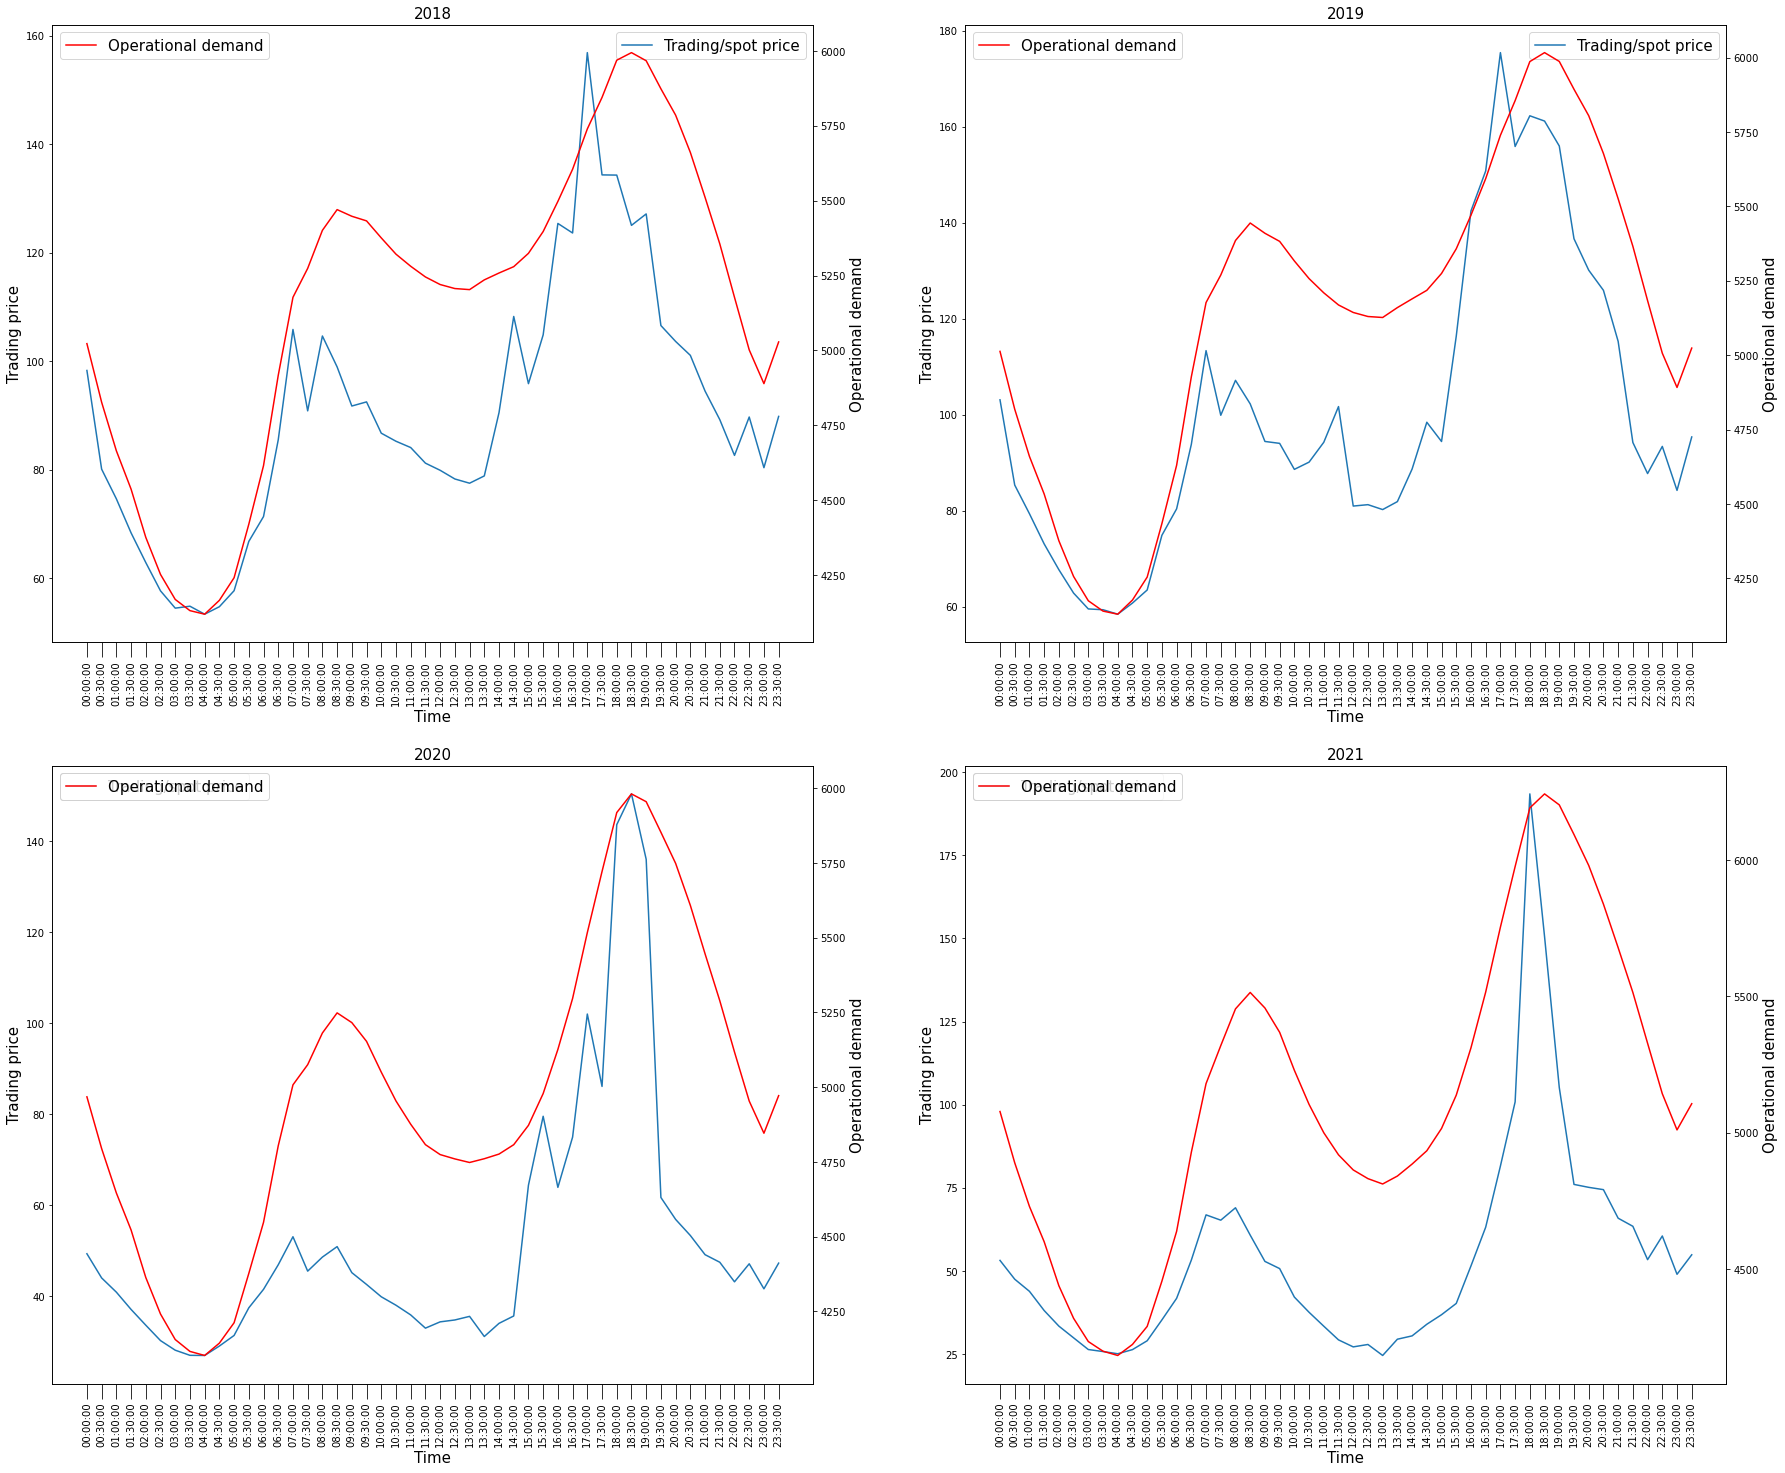

In [358]:
# plot of spot price vs. demand (not normalized)

fig, axes = plt.subplots(2,2, figsize = (30,25))
print(axes[0][0])
def graph_axes(df_name, x, y, year):
    a = sns.lineplot(y = (df_name['Regions VIC Trading Price ($/MWh)']), x = df_name.index.astype(str), ax = axes[x,y], data = h, legend="brief")
    ax2 = axes[x][y].twinx()
    b = sns.lineplot(y = (df_name['Regions VIC Operational Demand (MW)']), x = df_name.index.astype(str), ax = ax2, data = h, color='red')
    a.tick_params(axis='x', rotation=90, size=15)
    a.set_title(year, fontsize=15)
    a.set_ylabel("Trading price", fontsize=15)
    ax2.set_ylabel("Operational demand", fontsize=15)
    a.set_xlabel("Time", fontsize=15)
    a.legend(["Trading/spot price"], fontsize=15)
    b.legend(["Operational demand"], fontsize=15)

graph_axes(h_2018, 0,0, '2018')
graph_axes(h_2019, 0,1, '2019')
graph_axes(h_2020, 1,0, '2020')
graph_axes(h_2021, 1,1, '2021')


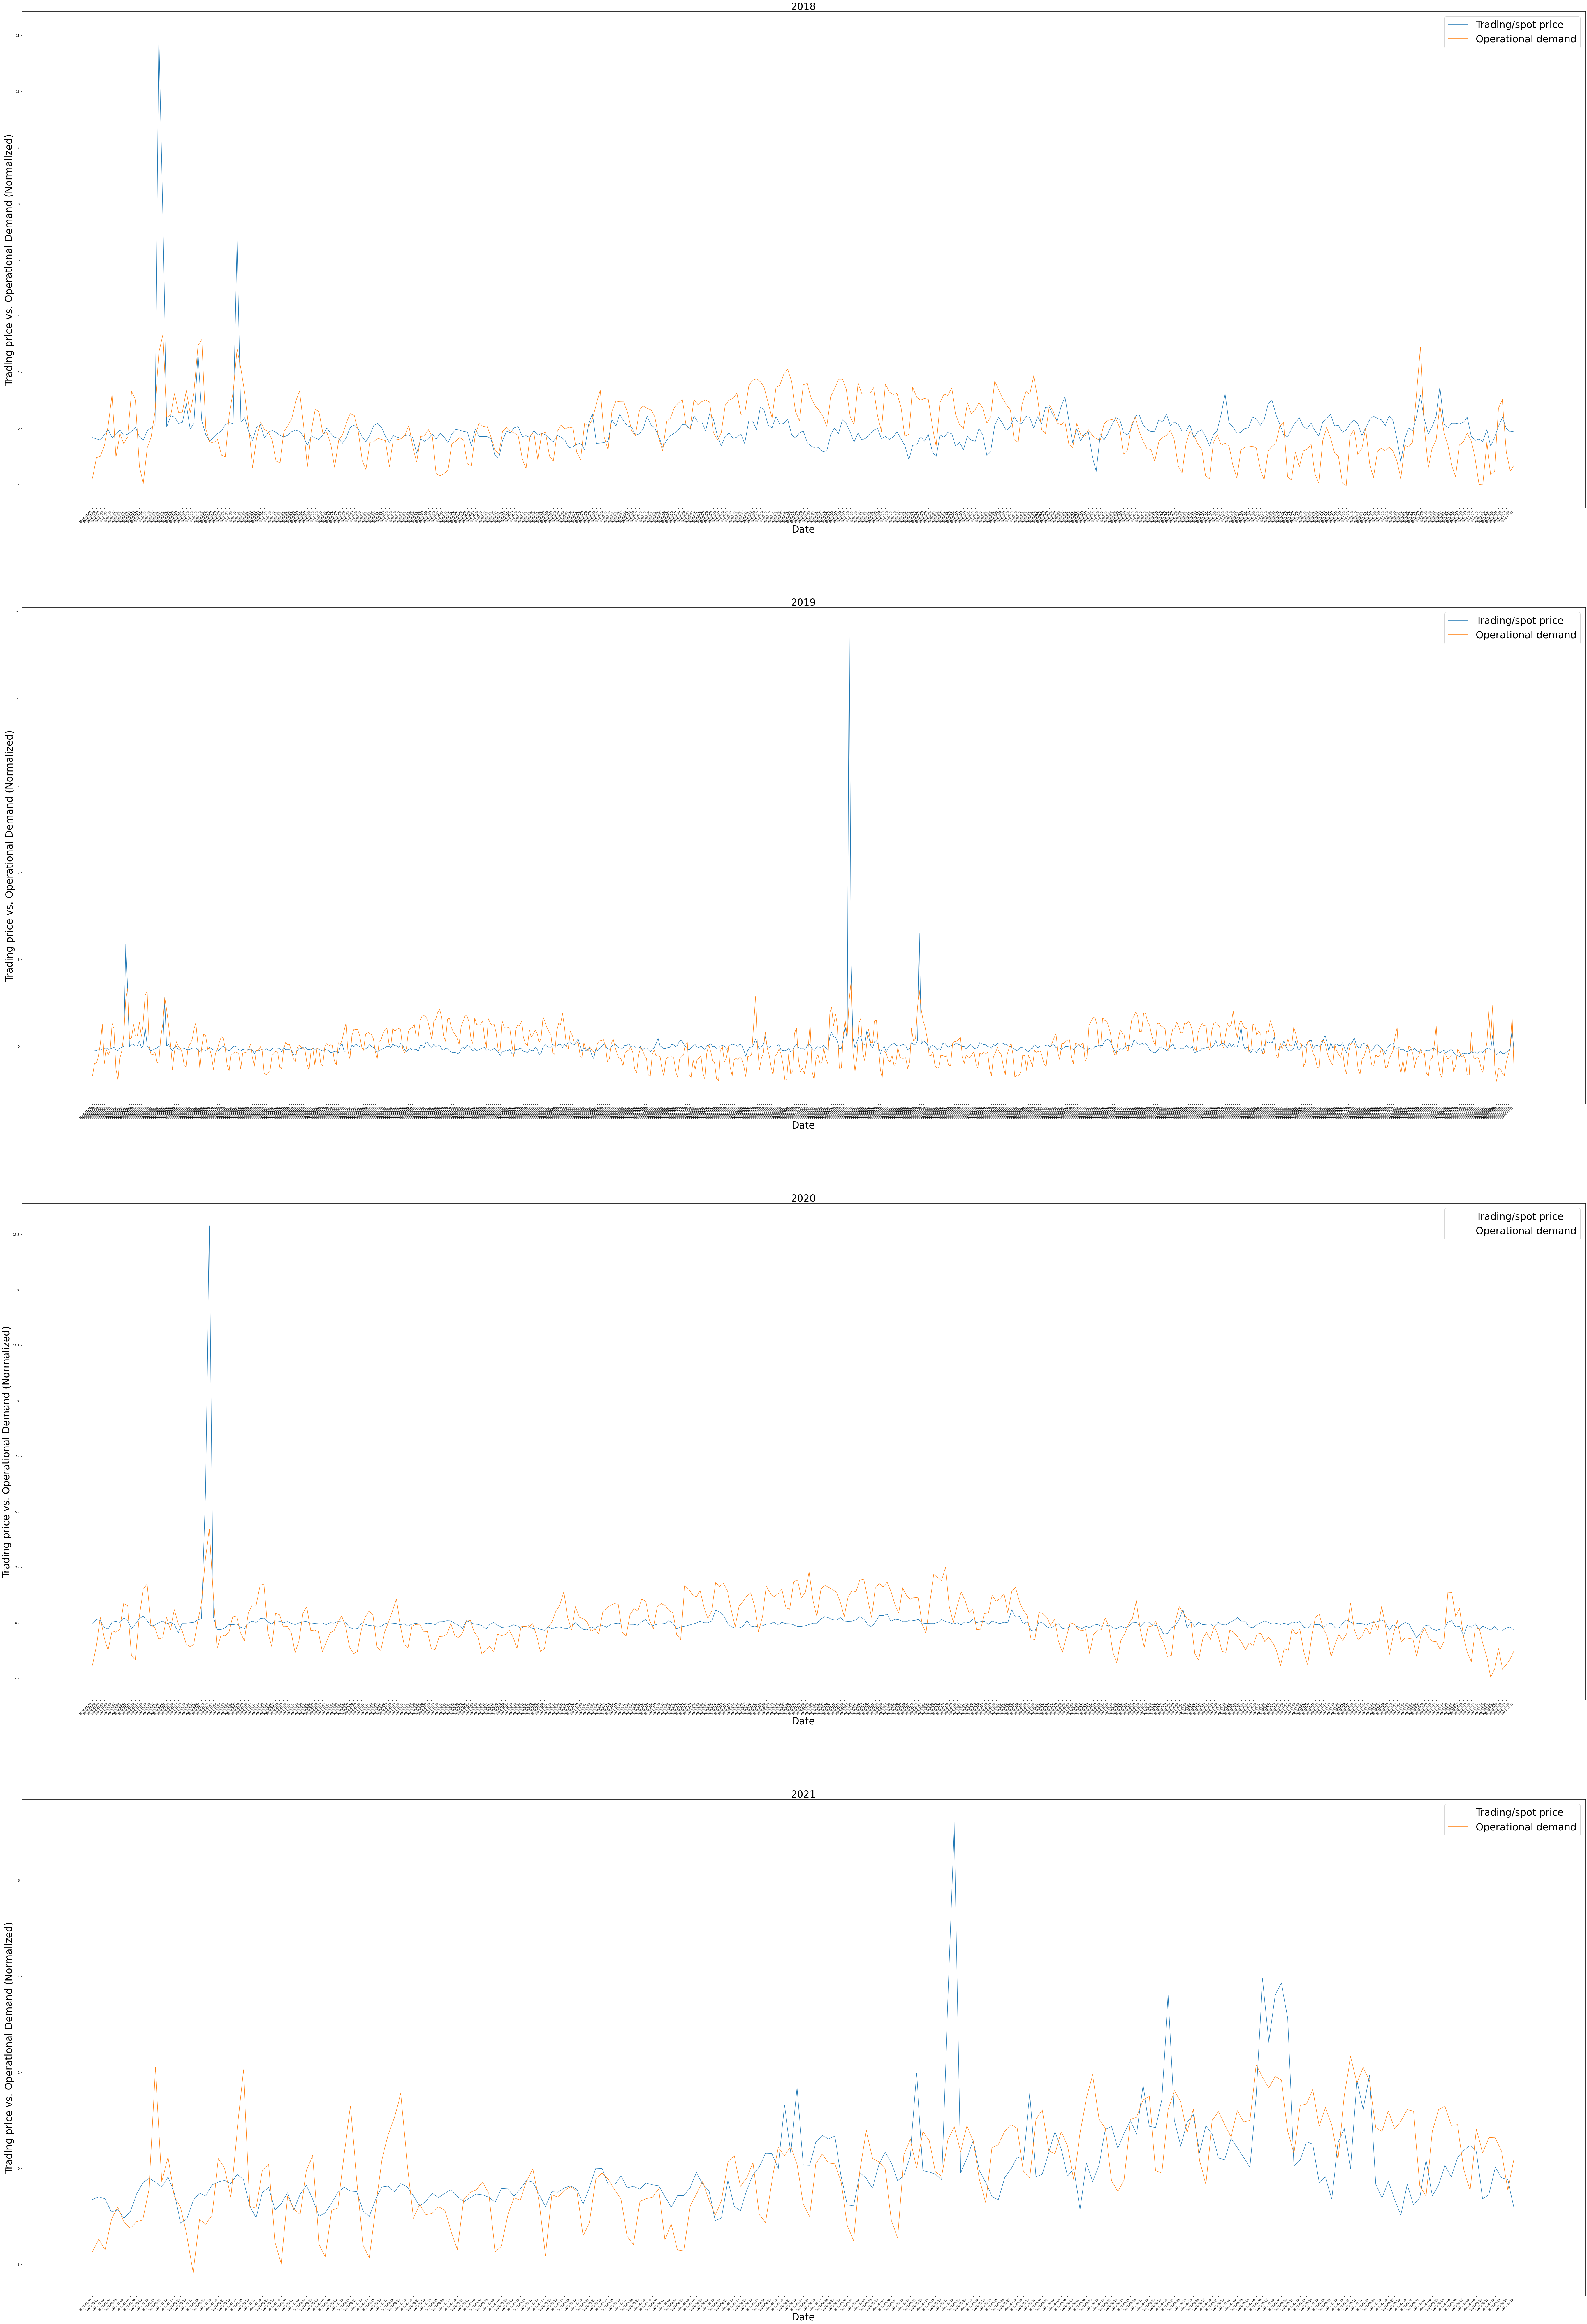

In [329]:
fig, axes = plt.subplots(4, figsize = (100,150))

def graph_axes(df_name, x, y, year):
    a = sns.lineplot(y = stats.zscore(df_name['Regions VIC Trading Price ($/MWh)']), x = df_name.index.astype(str), ax = axes[x], legend="brief")
    b = sns.lineplot(y = stats.zscore(df_name['Regions VIC Operational Demand (MW)']), x = df_name.index.astype(str), ax = axes[x])
    a.set_title(year, fontsize=35)
    a.set_xticklabels(df_name.index.astype(str), rotation=45, horizontalalignment='right')

    a.set_ylabel("Trading price vs. Operational Demand (Normalized)", fontsize=35)
    a.set_xlabel("Date", fontsize=35)
    a.legend(["Trading/spot price", "Operational demand"], fontsize=35)

graph_axes(hh_2018, 0,0, '2018')
graph_axes(hh_2019, 1,0, '2019')
graph_axes(hh_2020, 2,0, '2020')
graph_axes(hh_2021, 3,0, '2021')

## What causes price spikes

The AER’s State of the Energy Market 2020 report notes that extreme weather caused price spikes in early 2020, when bushfires caused transmission lines to trip and limited generation. These transmission interruptions led to market separation between the regions of the NEM, with spot prices hitting the then-cap of $14,700 per MWh on multiple days while the bushfires raged.

On the other hand, market volatility can also be seen in an increasing occurrence of negative prices (at these times, generators pay to stay connected to the grid when demand is low, if it comes at a lower cost than shutting down and re-starting their plants). The market set a record number of negative prices in the second half of 2019, typically at times when weather conditions are optimal for solar and wind generation, leading to oversupply.



## III. Preprocessing for Time Series Model

In [349]:
vic_only['Regions VIC Trading Price ($/MWh)'].shift(1)

0          NaN
1        90.43
2        92.46
3        87.62
4        73.08
         ...  
63452    57.92
63453    49.93
63454    62.86
63455    32.26
63456    25.10
Name: Regions VIC Trading Price ($/MWh), Length: 63457, dtype: float64

In [344]:
df = pd.DataFrame()
for cols in ['Regions VIC Trading Price ($/MWh)', 'Regions VIC Trading Total Intermittent Generation (MW)', 'Regions VIC Operational Demand (MW)']:
    for i in range(1, 53):
        df[f'{cols}_-{i}'] = vic_only[cols].shift(i)
df = df.dropna().reset_index(drop = True)
df

,Regions VIC Trading Price ($/MWh)_-1,Regions VIC Trading Price ($/MWh)_-2,Regions VIC Trading Price ($/MWh)_-3,Regions VIC Trading Price ($/MWh)_-4,Regions VIC Trading Price ($/MWh)_-5,Regions VIC Trading Price ($/MWh)_-6,Regions VIC Trading Price ($/MWh)_-7,Regions VIC Trading Price ($/MWh)_-8,Regions VIC Trading Price ($/MWh)_-9,Regions VIC Trading Price ($/MWh)_-10,...,Regions VIC Operational Demand (MW)_-43,Regions VIC Operational Demand (MW)_-44,Regions VIC Operational Demand (MW)_-45,Regions VIC Operational Demand (MW)_-46,Regions VIC Operational Demand (MW)_-47,Regions VIC Operational Demand (MW)_-48,Regions VIC Operational Demand (MW)_-49,Regions VIC Operational Demand (MW)_-50,Regions VIC Operational Demand (MW)_-51,Regions VIC Operational Demand (MW)_-52
0,51.96,56.32,57.33,60.31,63.55,61.09,64.77,66.06,71.25,70.04,...,3700.0,3688.0,3702.0,3749.0,3833.0,3956.0,4112.0,4238.0,4398.0,4599.0
1,53.57,51.96,56.32,57.33,60.31,63.55,61.09,64.77,66.06,71.25,...,3701.0,3700.0,3688.0,3702.0,3749.0,3833.0,3956.0,4112.0,4238.0,4398.0
2,52.50,53.57,51.96,56.32,57.33,60.31,63.55,61.09,64.77,66.06,...,3721.0,3701.0,3700.0,3688.0,3702.0,3749.0,3833.0,3956.0,4112.0,4238.0
3,53.61,52.50,53.57,51.96,56.32,57.33,60.31,63.55,61.09,64.77,...,3731.0,3721.0,3701.0,3700.0,3688.0,3702.0,3749.0,3833.0,3956.0,4112.0
4,53.13,53.61,52.50,53.57,51.96,56.32,57.33,60.31,63.55,61.09,...,3786.0,3731.0,3721.0,3701.0,3700.0,3688.0,3702.0,3749.0,3833.0,3956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63400,57.92,69.13,65.99,64.56,65.91,75.24,135.95,224.71,150.04,71.78,...,5249.0,5489.0,5515.0,5456.0,5633.0,5824.0,5935.0,6108.0,6221.0,6352.0
63401,49.93,57.92,69.13,65.99,64.56,65.91,75.24,135.95,224.71,150.04,...,5077.0,5249.0,5489.0,5515.0,5456.0,5633.0,5824.0,5935.0,6108.0,6221.0
63402,62.86,49.93,57.92,69.13,65.99,64.56,65.91,75.24,135.95,224.71,...,4917.0,5077.0,5249.0,5489.0,5515.0,5456.0,5633.0,5824.0,5935.0,6108.0
63403,32.26,62.86,49.93,57.92,69.13,65.99,64.56,65.91,75.24,135.95,...,4708.0,4917.0,5077.0,5249.0,5489.0,5515.0,5456.0,5633.0,5824.0,5935.0
